In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/iris.csv'
df = pd.read_csv(file_path)

print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa



Visualizing the Iris Dataset:


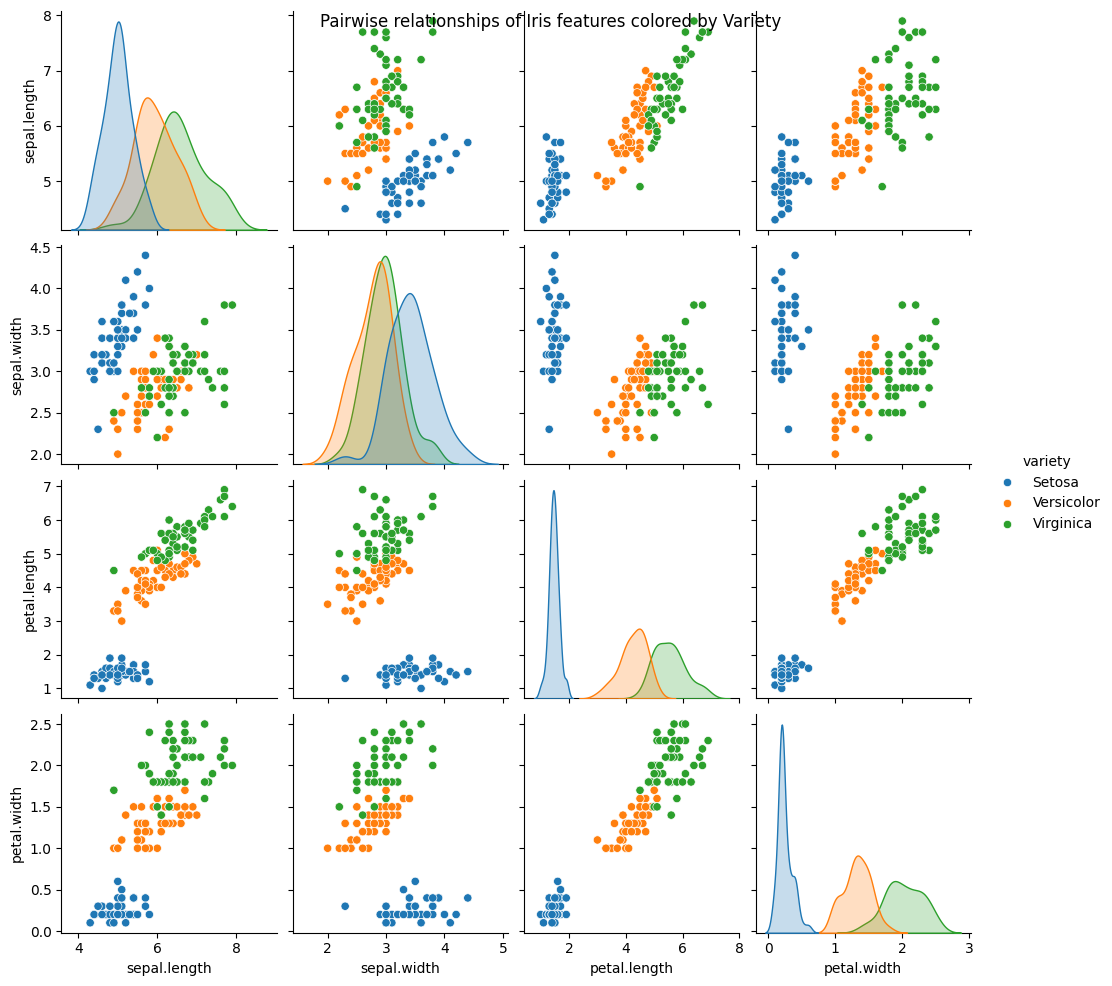

In [11]:
print("\nVisualizing the Iris Dataset:")
sns.pairplot(df, hue='variety')
plt.suptitle('Pairwise relationships of Iris features colored by Variety')
plt.show()

In [12]:
X = df.drop(columns=['variety'])
y = df['variety']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SVC()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"\nAccuracy of SVM model: {accuracy_score(y_test, y_pred)*100:.2f}%")


Accuracy of SVM model: 100.00%



Classification Report
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



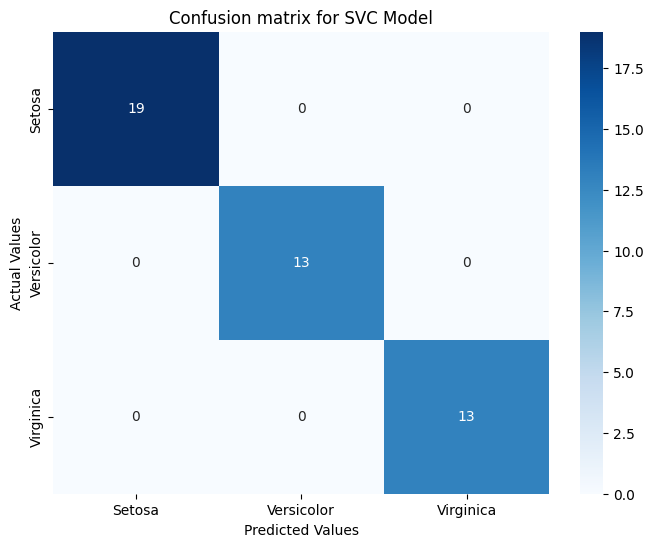

In [13]:
classification_report = classification_report(y_test, y_pred)
print("\nClassification Report\n",classification_report)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Confusion Matrix for SVC Model')
plt.title('Confusion matrix for SVC Model')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [14]:
sample = [[6.1, 3.0, 4.9, 1.8]]
prediction = model.predict(sample)
print(f"\nPrediction for sample: {prediction[0]}\n")


Prediction for sample: Virginica



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
